In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
colour_dict = {'DiamondMegan':(190,190,190),
             'CLARK':(178,223,138),
             'CLARK-S':(51,160,44),
             'Kraken':(255,127,0), 
             'PhyloSift':(102,205,0),
             'MetaPhlAn':(148,0,211),
             'LMAT':(176,48,96),
             'GOTTCHA':(106,61,154),
             'MetaFlow':(177,89,40),
             'BlastMegan':(166,206,227),
             'NBC':(255,0,255)}

In [3]:
results = {'walltime':{},'maxmem':{}}
for fi in ['walltime','maxmem']:
    csv = open(fi+'.csv','r')
    for line in csv.readlines():
        if line[0] != ',' and line != '':
            tabbed = line.split(',')
            results[fi][tabbed[0]] = [(i,float(val)) for i,val in enumerate(tabbed[1:]) if val != '']

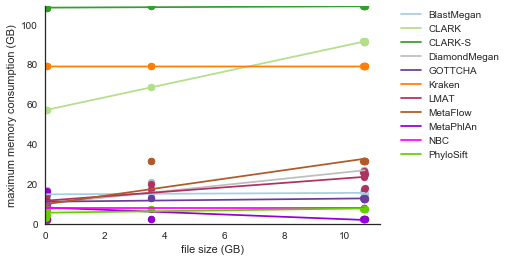

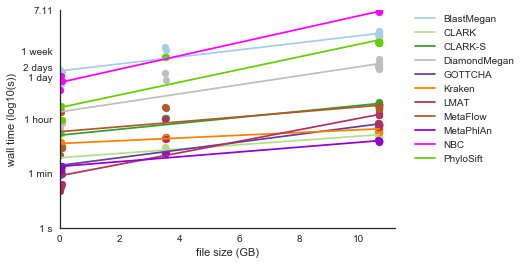

In [19]:
sns.set_style('white')
for fi in results:
    fig = plt.figure()
    max_y = 0
    for tool in sorted(results[fi].keys()):
        if tool != "gzip filesize (GB)":
            y = [n[1] for n in results[fi][tool]]
            if fi == 'walltime':
                y = [np.log10(n) for n in y]
            else:
                y = [n*1./1000000 for n in y]
            #print fi, tool, y
            if max(y) > max_y:
                max_y = max(y)
            y_inds = set([n[0] for n in results[fi][tool]])
            tool_colour = tuple([c*1./255 for c in list(colour_dict[tool])])
            #print tool, tuple([c*1./255 for c in list(colour_dict[tool])])
            x = [n[1] for n in results[fi]["gzip filesize (GB)"] if n[0] in y_inds]
            plt.scatter(x,y,color=tool_colour)
            plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color=tool_colour,label=tool)

    if fi == 'maxmem':
        plt.ylabel('maximum memory consumption (GB)')
    else:
        plt.ylabel('wall time (log10(s))')
   
    if fi == 'walltime':
        locs, labels = plt.yticks()
        new_labels = ['1 s','1 min','1 hour','1 day','2 days','1 week',np.round(max_y,2)]
        new_locs = [np.log10(z) for z in [1,60,3600,86400,172800,604800]]+[max_y]
        plt.yticks(new_locs, new_labels)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('file size (GB)')
    #plt.title(fi)
    plt.ylim([0,max_y])
    plt.xlim([0,11.2])
    sns.despine()
    plt.savefig(fi+'.pdf',dpi=500,bbox_inches='tight',transparent=True)

In [5]:
results["walltime"]["gzip filesize (GB)"] 

[(0, 10.667),
 (1, 10.67),
 (2, 10.669),
 (3, 10.666),
 (4, 10.665),
 (5, 3.532),
 (6, 3.547),
 (7, 10.645),
 (8, 10.686),
 (9, 10.688),
 (10, 0.014),
 (11, 0.069),
 (12, 0.051)]

In [20]:
y_inds

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [15]:
np.log10(60)

1.7781512503836436